In [6]:
import numpy as np
import matplotlib.pyplot as plt
from local_contributor_config import problem_folder

In [7]:
path_to_plots = r'C:/gr_latex/diploma/pictures'

Выделение инсулина на ввод пищи:
1. на белок
2. на жир
3. на глюкозу
4. суммарно

In [8]:
from F_vec import *
from scipy.integrate import odeint
from myo_supportfs import *
from Plotting.myplt import *
from pprint import pprint
from scipy.integrate import ode,solve_ivp
from euler import euler_solver


index_by_name, name_by_index, start_point = get_start_point_names_mapping(start_point_dict)
# start_point = 0.1+ 10*np.random.rand(len(start_point))
start_point[index_by_name['AA_ef']] = 1.0
start_point[index_by_name['FFA_ef']] = 1.0
start_point[index_by_name['KB_ef']] = 1.0
start_point[index_by_name['Glu_ef']] = 1.0
start_point[index_by_name['INS']] = 0.0


J_flow_carb_vs = J_flow_carb_func.values
J_flow_prot_vs = J_flow_prot_func.values
J_flow_fat_vs  = J_flow_fat_func.values 


INS_on_grid = np.zeros(shape=(len(time_grid), ),dtype=np.float32)
INS_AUC_w_on_grid = np.zeros(shape=(len(time_grid), ),dtype=np.float32)
INS_on_grid[0] = start_point[index_by_name['INS']]
T_a_on_grid = np.zeros(shape=(len(time_grid), ),dtype=np.float32)
INS_AUC_w_on_grid[0] = 0.0
T_a_on_grid[0]= 0.0
last_seen_time = np.zeros(shape=(1,),dtype=np.float32)
last_seen_time[0] = t_0
last_time_pos = np.zeros(shape=(1,),dtype=np.intc)
last_time_pos[0] = 0

def F_wrapped(t, y):
    return F_vec(t,y,INS_on_grid,INS_AUC_w_on_grid,T_a_on_grid,last_seen_time,last_time_pos,
                 J_flow_carb_vs,
                    J_flow_prot_vs,
                    J_flow_fat_vs)

solver = ode(f=F_wrapped,jac=None)
solver.set_initial_value(y=start_point,t=t_0)
# solver_type = 'lsoda'
# solver_type = 'dopri5'
solver_type = 'vode'
solver.set_integrator(solver_type) 
solutions = np.zeros(shape=(len(time_grid),len(start_point)),dtype=np.float32)
solutions[0,:] = solver.y
i_=  1
while solver.successful() and solver.t < t_end-tau_grid:
    solutions[i_,:] = solver.integrate(solver.t+tau_grid)
    i_ += 1 
print('last solver time step {} target last step {}'.format(i_, len(time_grid)-1))
time_sol = time_grid

print(solutions.shape)
print(time_sol.shape)    

last solver time step 2200000 target last step 2200000
(2200001, 50)
(2200001,)


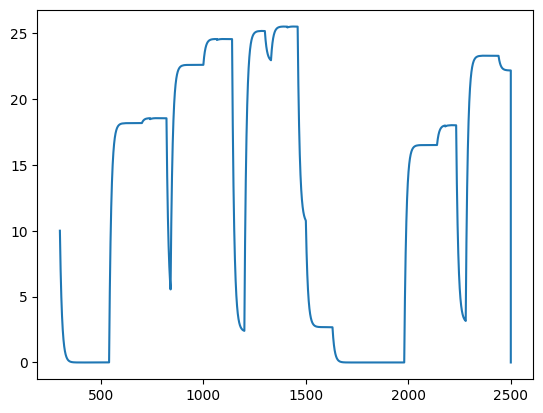

In [9]:
INS_vec = solutions[:,index_by_name['INS']]
t_vec = time_sol
fig,ax = plt.subplots()
ax.plot(t_vec,INS_vec)

Выделение инсулина в ответ на концентрацию глюкозы в крови.  (Ввод пищи только в вену, без кишечника)

Показать график БМР. поток выходящей энергии- постоянный. При этом компоненты БМР могут меняться (во время еды, ночью и тп), а сумма выходящей энергии в единицу времени - всё рвно постоянная.